In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [24]:
# 先用pandas读入csv
from sklearn.model_selection import train_test_split
df = pd.read_csv('train.csv') # 导入原始训练集
Y = df.iloc[:, 0].values  # 标签数据
X = df.iloc[:, 1:].values  # 特征数据
Y_test = df.iloc[:, 0].values   # 标签数据
X_test = df.iloc[:, 1:].values  # 特征数据
np.save("X.npy", X)
np.save("Y.npy", Y)
X_train = np.load('X.npy')
Y_train = np.load('Y.npy')

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

print("数据形状:", X_train.shape) 
print("数据形状:", Y_train.shape) 
print("数据形状:", X_test.shape) 
print("数据形状:", Y_test.shape) 

数据形状: (42000, 784)
数据形状: (42000,)
数据形状: (42000, 784)
数据形状: (42000,)


数据形状: (42000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
数据形状: (42000,)
[1 0 1 4 0 0 7 3 5 3]


(-0.5, 27.5, 27.5, -0.5)

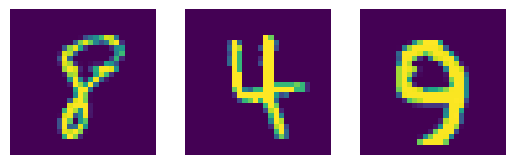

In [25]:
# load data set
img_size = 28
dataX = np.load('X.npy') # 查看数据形状
print("数据形状:", dataX.shape) # 打印前五行数据 
print(dataX[:10])
dataY = np.load('Y.npy') # 查看数据形状
print("数据形状:", dataY.shape) # 打印前五行数据

print(dataY[:10])

plt.subplot(1, 3, 1)
plt.imshow(dataX[290].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(dataX[950].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(dataX[1560].reshape(img_size, img_size))
plt.axis('off')

In [26]:
# 统计训练集中0到9的数目
values, counts = np.unique(dataY, return_counts=True)

# 输出 0 到 9 的计数
for i in range(10):
    print(f"{i}: {counts[np.where(values == i)][0] if i in values else 0}")

0: 4132
1: 4684
2: 4177
3: 4351
4: 4072
5: 3795
6: 4137
7: 4401
8: 4063
9: 4188


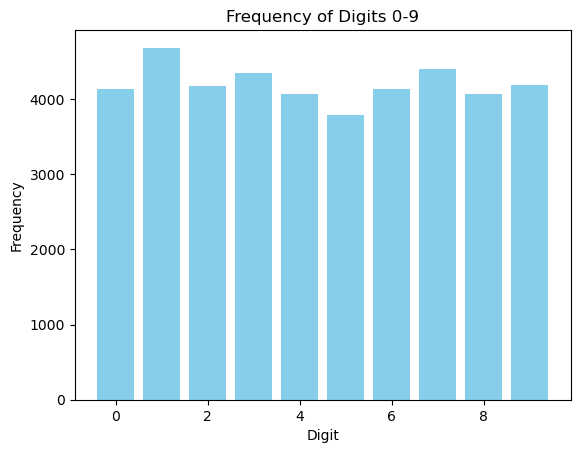

In [27]:
# 绘制数字出现频次直方图
# 设置 x 轴为 0 到 9
x = np.arange(10)

# 创建一个柱状图
plt.bar(x, counts, color="skyblue")

# 设置标题和标签
plt.title("Frequency of Digits 0-9")
plt.xlabel("Digit")
plt.ylabel("Frequency")

# 显示图形
plt.show()

可以看出各个数字的出现频次分布比较均匀。无需过多处理。

In [28]:
# 下面统计图片中各个灰度值的出现频次
values, counts = np.unique(dataX, return_counts=True)

# 输出 0 到 255 的计数
for i in range(256):
    print(f"{i}: {counts[np.where(values == i)][0] if i in values else 0}")

0: 26621312
1: 16170
2: 23601
3: 25196
4: 26733
5: 27358
6: 26188
7: 27363
8: 21668
9: 26703
10: 24799
11: 25025
12: 21308
13: 27957
14: 18903
15: 20090
16: 20193
17: 19216
18: 18992
19: 23983
20: 21095
21: 24903
22: 19141
23: 15953
24: 17927
25: 20918
26: 16860
27: 16742
28: 17844
29: 25924
30: 15890
31: 18291
32: 20182
33: 11018
34: 13932
35: 15182
36: 15479
37: 17357
38: 18369
39: 12632
40: 14442
41: 18851
42: 15600
43: 14909
44: 13305
45: 14729
46: 12111
47: 16861
48: 13812
49: 12477
50: 17009
51: 17509
52: 10245
53: 13448
54: 12670
55: 12624
56: 16196
57: 22260
58: 10089
59: 12587
60: 12557
61: 12652
62: 13840
63: 16794
64: 32934
65: 10993
66: 12350
67: 11186
68: 11483
69: 11762
70: 13542
71: 12961
72: 11996
73: 13471
74: 9671
75: 11122
76: 12388
77: 9404
78: 12303
79: 12589
80: 11019
81: 11679
82: 14921
83: 10708
84: 18847
85: 17659
86: 18136
87: 8999
88: 11184
89: 12340
90: 8944
91: 12623
92: 12969
93: 12121
94: 11550
95: 11483
96: 12338
97: 9924
98: 11512
99: 12535
100: 10644
1

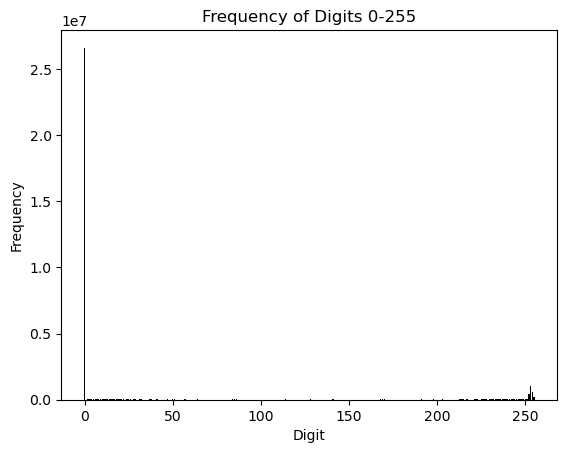

In [29]:
# 绘制灰度值出现频次直方图
# 设置 x 轴为 0 到 255
x = np.arange(256)

# 创建一个柱状图
plt.bar(x, counts, color="black")

# 设置标题和标签
plt.title("Frequency of Digits 0-255")
plt.xlabel("Digit")
plt.ylabel("Frequency")

# 显示图形
plt.show()

灰度值为0的点明显多出几个量级，影响直方图的观感，下面不考虑这些灰度值为0的点进一步绘图观察。

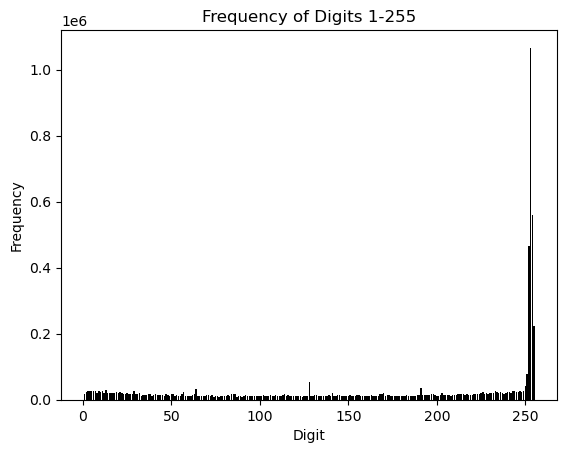

In [30]:
# 绘制灰度值出现频次直方图
# 设置 x 轴为 1 到 255
x = np.arange(1,256)

# 创建一个柱状图
plt.bar(x, counts[1:], color="black")

# 设置标题和标签
plt.title("Frequency of Digits 1-255")
plt.xlabel("Digit")
plt.ylabel("Frequency")

# 显示图形
plt.show()

灰度值≥252的点明显又比其他点多出一个数量级，我们进一步绘图。

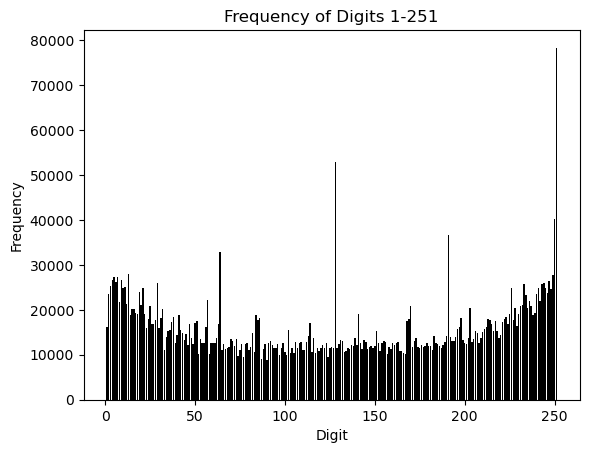

In [31]:
# 绘制灰度值出现频次直方图
# 设置 x 轴为 1 到 251
x = np.arange(1, 252)

# 创建一个柱状图
plt.bar(x, counts[1:252], color="black")

# 设置标题和标签
plt.title("Frequency of Digits 1-251")
plt.xlabel("Digit")
plt.ylabel("Frequency")

# 显示图形
plt.show()

100到150中间又存在一个明显突出的值，进一步绘制。

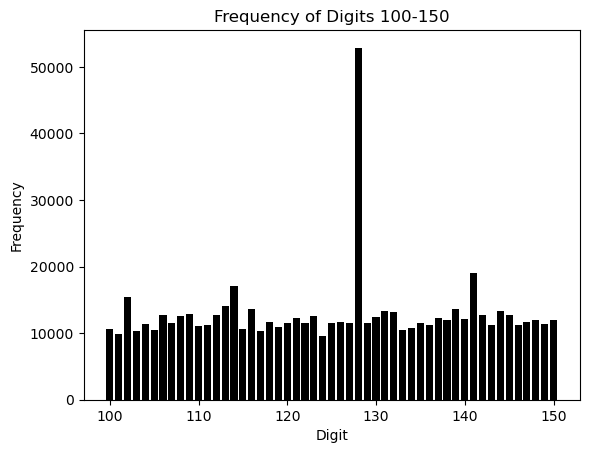

In [32]:
# 绘制灰度值出现频次直方图
# 设置 x 轴为 100 到 150
x = np.arange(100, 151)

# 创建一个柱状图
plt.bar(x, counts[100:151], color="black")

# 设置标题和标签
plt.title("Frequency of Digits 100-150")
plt.xlabel("Digit")
plt.ylabel("Frequency")

# 显示图形
plt.show()

总结：在0和255附近的灰度值占绝大多数，即从整体上看，图像基本由黑点和亮度极高的亮点构成
从最后一张直方图可以看出，灰度值为128的点数量也相对偏多，这或许提示我们在锐化时可能可以以128作为一个分隔点。